In [1]:
import glob
import pandas as pd
import itertools

In [6]:
# prefix path of data location
path = "LDA_data/"

In [10]:
def draw_plot(path, variable, constant):
    """
    Input:
        path - prefix path of data location
        variable - the varying value. tn or decay.
        constant - the constant value. purity or decay. Y axis
        
    Upon call, method saves the required plot to "path" and draws the plot inline
    
    """
    # to manually pass file names
    # append relative file paths to filepaths
    #filepaths = ["LDA_data/data/Dpoint001baseline2.decay.purity.csv"]
    
    # Parse filepaths using glob 
    # Files have to be named correctly
    ###################################################################
    #### USE NAMING CONVENTION path/filename.variable.constant.csv ####
    ################################################################### 
    filepaths = glob.glob(path+"*."+variable+"."+constant+".csv")
    
    
    print(filepaths)
    

    
    # Set dataframe headers based on grpah being plotted
    # Filepaths must be populated in the same order as these lists
    # Could technically populate these from filenames but that removes flexibility and relies too much on filename
    tn = ['10', '20', '30', '40', 'TNVar'] # Change these values to reflect actual tn or decay values
    decay = ['00001','.001', '0.5', '0.75', '0.9']
    
    header = []
    if variable == "decay":
        for x in decay:
            header.append(["decay = "+x]) # modify this to change legend
    elif variable == "tn":
        for x in tn:
            header.append(["tn = "+x])
    
    
    # load dataframe from csv
    dfs = []
    for i, filename in enumerate(filepaths):
        dfs.append(pd.read_csv(filename, names = header[i] )) # read from csv and add header/name to each df
    df = pd.concat(dfs,axis = 1)
    
    # set plot characteristics 
    marker = itertools.cycle(('o', 'D', 'v', 's', 'P', '*', 'X')) # markers for each line
    title = "With different "+variable
    x_label = "Iterations"
    y_label = "Average "+constant

    # using df plot intead of generating plt.fig and plt.plot
    p = df.plot.line(title = title, xlabel = x_label, ylabel = y_label)
    
    for i, line in enumerate(p.get_lines()): # set marker for each line in plot
        line.set_marker(next(marker))
    
    # some tweaking on plot y axis range
    y_range = (p.get_ylim()[1] - p.get_ylim()[0])/3
    ylim = [p.get_ylim()[0]- y_range, p.get_ylim()[1]+y_range]
    p.set_ylim(ylim)
    
    p.get_figure().savefig(path+variable+constant+".pdf") # save plot to disk

### Call these methods to draw plots ###    
def plot_decay(path):
    draw_plot(path, "decay", "purity")
    draw_plot(path, "decay", "confidence")
    
def plot_tn(path):
     draw_plot(path, "tn", "purity")
     draw_plot(path, "tn", "confidence")

['LDA_data\\Dpoint00001baseline2.decay.purity.csv', 'LDA_data\\Dpoint001baseline2.decay.purity.csv', 'LDA_data\\Dpoint5baseline2.decay.purity.csv', 'LDA_data\\Dpoint75baseline2.decay.purity.csv', 'LDA_data\\Dpoint9baseline2.decay.purity.csv']
['LDA_data\\Dpoint00001baseline2.decay.confidence.csv', 'LDA_data\\Dpoint001baseline2.decay.confidence.csv', 'LDA_data\\Dpoint5baseline2.decay.confidence.csv', 'LDA_data\\Dpoint75baseline2.decay.confidence.csv', 'LDA_data\\Dpoint9baseline2.decay.confidence.csv']


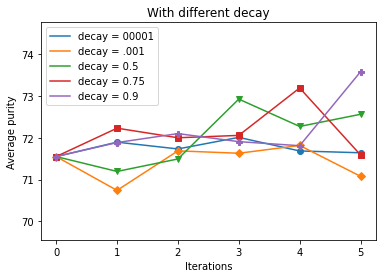

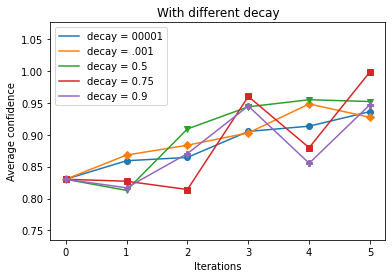

In [11]:
plot_decay(path)

['LDA_data\\T10baseline2.tn.purity.csv', 'LDA_data\\T20baseline2.tn.purity.csv', 'LDA_data\\T30baseline2.tn.purity.csv', 'LDA_data\\T40baseline2.tn.purity.csv', 'LDA_data\\Tvarbaseline2.tn.purity.csv']
['LDA_data\\T10baseline2.tn.confidence.csv', 'LDA_data\\T20baseline2.tn.confidence.csv', 'LDA_data\\T30baseline2.tn.confidence.csv', 'LDA_data\\T40baseline2.tn.confidence.csv', 'LDA_data\\Tvarbaseline2.tn.confidence.csv']


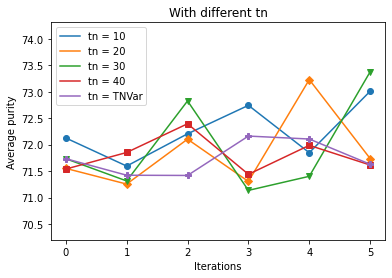

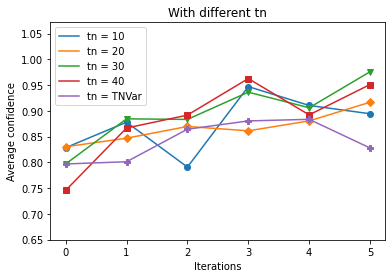

In [12]:
plot_tn(path)